In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
spotify = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
spotify.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [3]:
spotify.drop('time_signature',axis = 1, inplace=True)

In [4]:
spotify.nunique()

artist_name          34621
track_id            130326
track_name          108890
acousticness          4908
danceability          1257
duration_ms          77897
energy                2571
instrumentalness      5387
key                     12
liveness              1717
loudness             25888
mode                     2
speechiness           1616
tempo                57314
valence               1918
popularity             100
dtype: int64

In [5]:
spotify.isnull().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  valence           130663 non-null  float64
 15  popularity        130663 non-null  int64  
dtypes: float64(9), int64

In [7]:
spotify.shape

(130663, 16)

In [8]:
len(spotify.columns)

16

In [9]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,1.000000,100.000000


In [37]:
spotify.corr()

C:\Users\necme\AppData\Local\Temp\ipykernel_356\1807932982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify.corr()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.360462,0.033426,-0.710067,0.272685,-0.019987,-0.100545,-0.603366,0.067171,-0.119231,-0.216328,-0.177023,-0.116520
danceability,-0.360462,1.000000,-0.126781,0.286196,-0.305112,0.021123,-0.137377,0.431554,-0.057912,0.248192,0.081791,0.461468,0.131086
duration_ms,0.033426,-0.126781,1.000000,-0.019885,0.029124,-0.001880,-0.003661,-0.018595,0.010321,-0.101955,-0.009657,-0.141837,-0.000801
energy,-0.710067,0.286196,-0.019885,1.000000,-0.301308,0.039843,0.209448,0.766697,-0.069263,0.105078,0.229930,0.314768,0.122506
instrumentalness,0.272685,-0.305112,0.029124,-0.301308,1.000000,-0.025072,-0.058390,-0.508519,-0.002211,-0.217359,-0.086894,-0.246869,-0.216447
key,-0.019987,0.021123,-0.001880,0.039843,-0.025072,1.000000,0.009191,0.028101,-0.176238,0.010354,0.005464,0.043348,0.002682
liveness,-0.100545,-0.137377,-0.003661,0.209448,-0.058390,0.009191,1.000000,0.062168,-0.001325,0.106801,-0.009126,-0.007800,-0.031174
loudness,-0.603366,0.431554,-0.018595,0.766697,-0.508519,0.028101,0.062168,1.000000,-0.036081,0.074456,0.223067,0.319881,0.244088
mode,0.067171,-0.057912,0.010321,-0.069263,-0.002211,-0.176238,-0.001325,-0.036081,1.000000,-0.053554,-0.000249,0.011082,-0.009070
speechiness,-0.119231,0.248192,-0.101955,0.105078,-0.217359,0.010354,0.106801,0.074456,-0.053554,1.000000,0.054827,0.121552,-0.000214


In [25]:
top_five_artists = spotify.groupby('artist_name').count().sort_values(by = 'track_name',ascending=False)[:5]
top_five_artists.head(5)

,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
artist_name,,,,,,,,,,,,,,,
Johann Sebastian Bach,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621,3621
Wolfgang Amadeus Mozart,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755
Armin van Buuren,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
Ludwig van Beethoven,928,928,928,928,928,928,928,928,928,928,928,928,928,928,928
Frédéric Chopin,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614


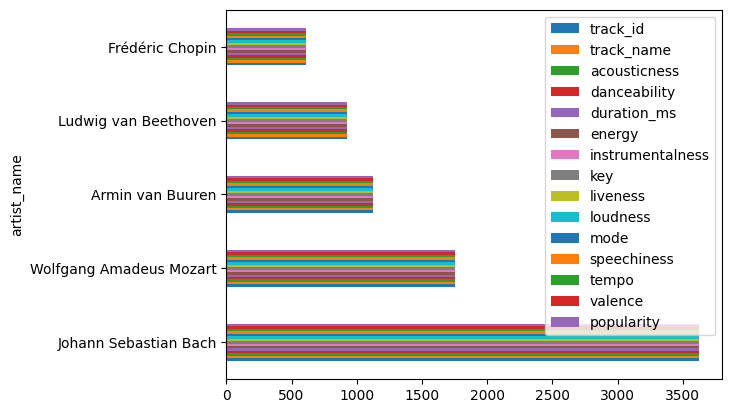

In [26]:
top_five_artists.plot.barh()
plt.show()

In [17]:
top_five_loudest_track = spotify[['loudness','track_name','artist_name']].sort_values(by='loudness',ascending=False)[:5]
top_five_loudest_track

,loudness,track_name,artist_name
24318,1.806,Bass,araabMUZIK
20658,1.750,The Diarrhea Song,"Steve Lieberman, The Gangsta Rabbi"
23640,1.187,Lalalala,araabMUZIK
98408,0.935,Sajan Mara Dilni Rani,Govind Bajaniya
99459,0.905,Jija Ji Devghar Ghumadi,Ritu Chauhan


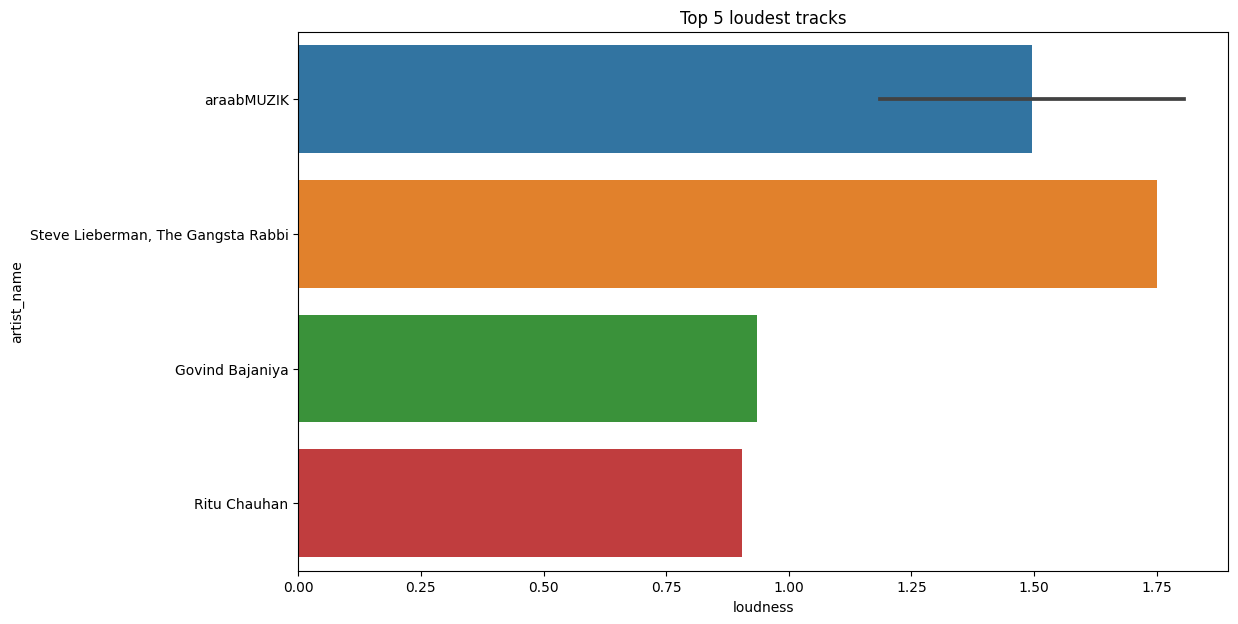

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x='loudness', y='artist_name', data=top_five_loudest_track)
plt.title('Top 5 loudest tracks')
plt.show()

In [20]:
most_danceable_track = spotify[['danceability','track_name','artist_name']].sort_values(by='danceability',ascending=False)[:5]
most_danceable_track

,danceability,track_name,artist_name
35119,0.996,Tappy Toes,Louie Zong
68976,0.986,Familiar Feeling,TÂCHES
82706,0.986,No Worries,Jean Tonique
23717,0.986,Jazzy Guitars Needed,DJ Juan 9000
66741,0.986,Paper Plates,The Real Triple D


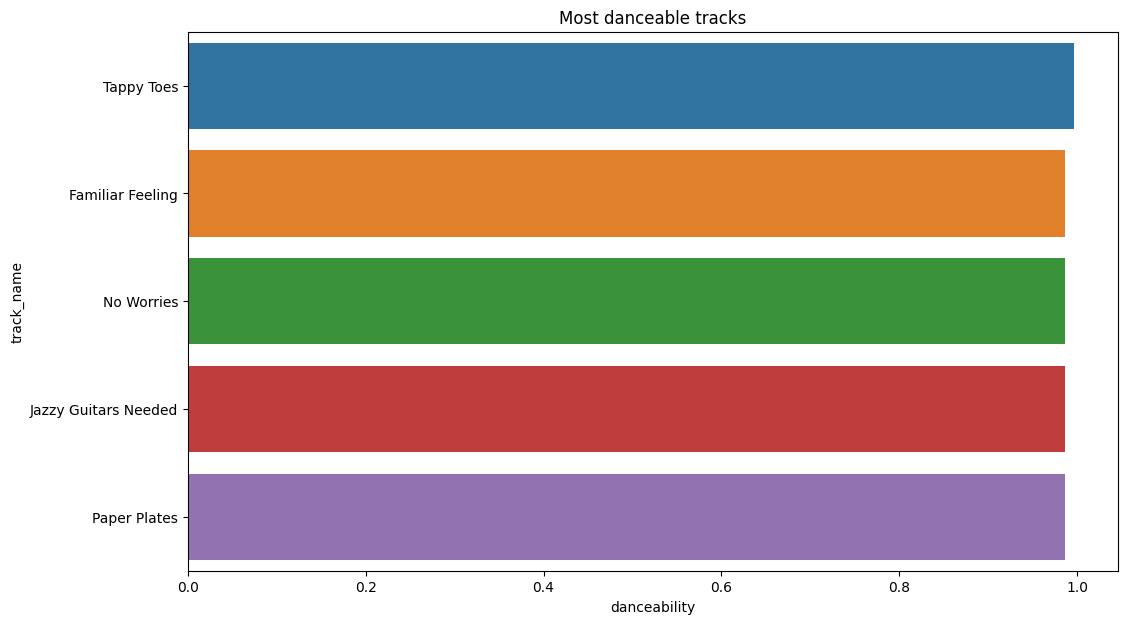

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability', y='track_name', data=most_danceable_track)
plt.title('Most danceable tracks')
plt.show()

In [28]:
top_ten_instrumentalness = spotify[['instrumentalness','track_name','artist_name']].sort_values(by='instrumentalness',ascending=False)[:10]
top_ten_instrumentalness

,instrumentalness,track_name,artist_name
98698,1.0,Soft Brown Noise,High Altitude Samples
68402,1.0,Gentle Thunderstorm,Rain Sounds
58349,1.0,Relaxing White Noise One,Granular
98021,1.0,Monotone White Noise,Audio Receptors
40213,1.0,Brownian Binaural Bliss,Lucid Dreaming World-Collective Unconscious Mind
71882,1.0,The Brown Noise,Smoothed Brown Noise
30947,1.0,Sweeping White Noise,Static Canvas
90227,1.0,Pink Noise for Babies (Free Sleep Noise),Relax Looped Noise Sleep
86502,1.0,REM Sleep and Inner Peace (Theta Waves) - Loop...,Binaural Beats
49153,1.0,Noise Blocking Pink,Pink Noise


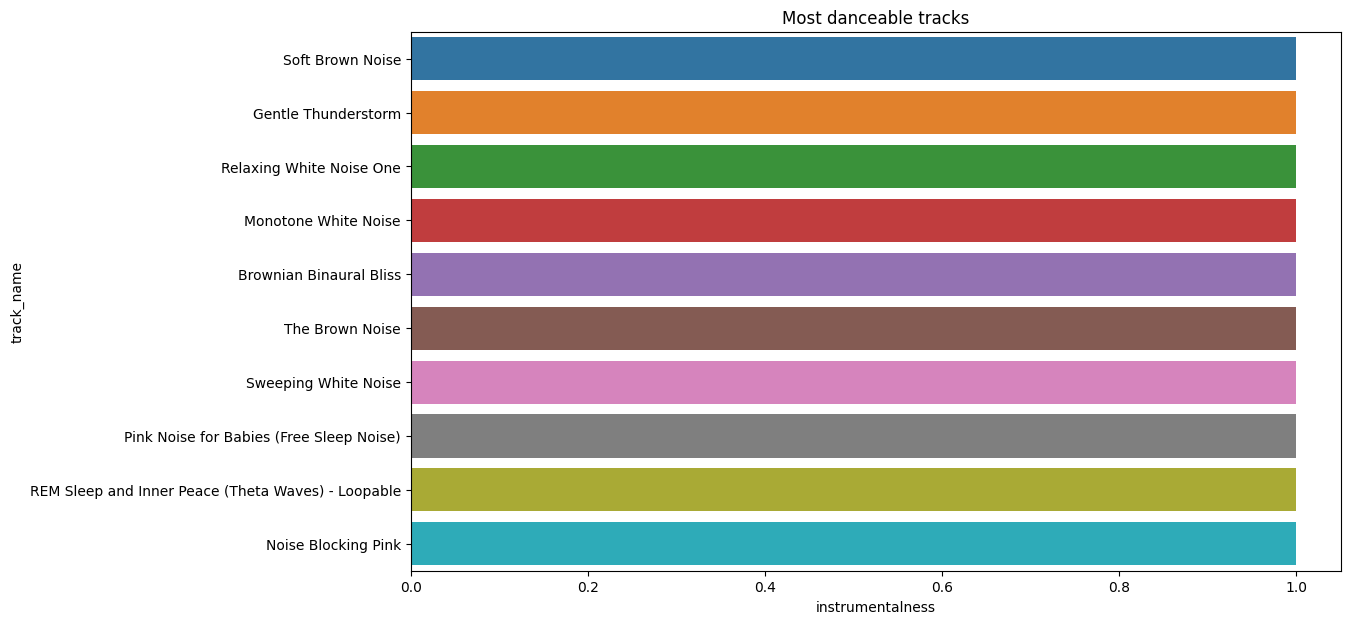

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x='instrumentalness', y='track_name', data=top_ten_instrumentalness)
plt.title('Most instrumentalness tracks')
plt.show()

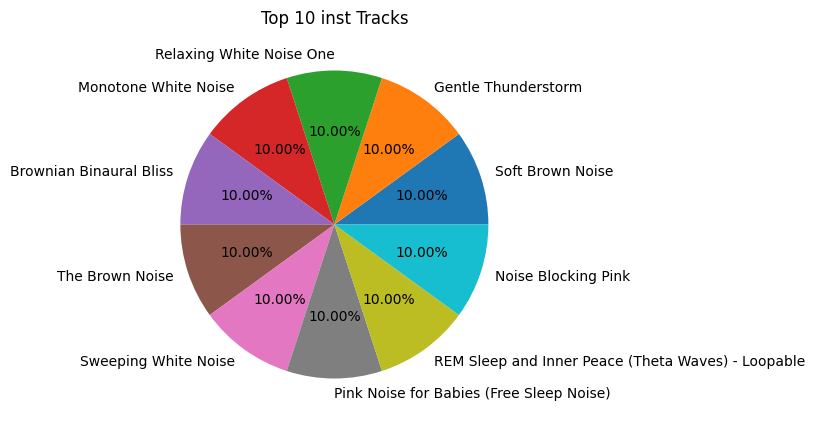

In [33]:
plt.figure(figsize=(12,5))
plt.pie(x = 'instrumentalness', data = top_ten_instrumentalness, autopct ='%1.2f%%',labels='track_name' )
plt.title('Top 10 inst Tracks')
plt.show()

In [35]:
pop_more_than_90 = spotify[spotify.popularity > 90].sort_values(by = 'popularity', ascending=False)
pop_more_than_90

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
99393,Daddy Yankee,5w9c2J52mkdntKOmRLeM2m,Con Calma,0.11000,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,0.6560,100
99364,Post Malone,6MWtB6iiXyIwun0YzU6DFP,Wow.,0.16300,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,0.3850,98
99366,Jonas Brothers,4y3OI86AEP6PQoDE6olYhO,Sucker,0.04270,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,0.9520,98
99368,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,bad guy,0.30800,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,0.5780,98
123909,Post Malone,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,0.52000,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,0.9270,98
99365,Ariana Grande,4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",0.04210,0.726,190440,0.554,0.000000,5,0.1060,-5.290,0,0.0917,169.999,0.3350,97
99375,Sam Smith,6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),0.45000,0.741,171030,0.520,0.000002,8,0.2220,-7.513,1,0.0656,102.998,0.3470,96
123873,Halsey,5p7ujcrUXASCNwRaWNHR1C,Without Me,0.29700,0.752,201661,0.488,0.000009,6,0.0936,-7.050,1,0.0705,136.041,0.5330,96
123941,Ava Max,25sgk305KZfyuqVBQIahim,Sweet but Psycho,0.06910,0.719,187436,0.704,0.000000,1,0.1660,-4.724,1,0.0476,133.002,0.6280,96
99372,Ariana Grande,14msK75pk3pA33pzPVNtBF,7 rings,0.57800,0.725,178640,0.321,0.000000,1,0.0884,-10.744,0,0.3230,70.142,0.3190,96


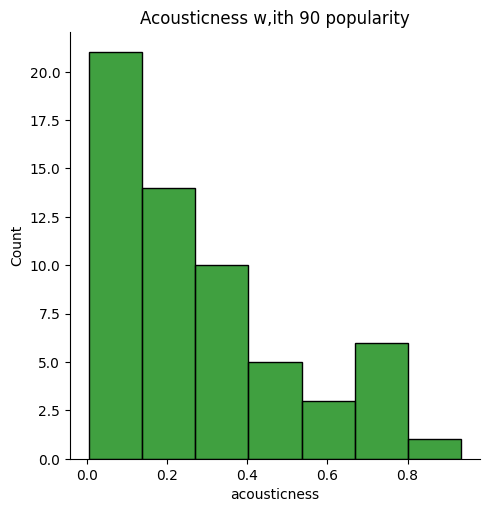

In [36]:
sns.displot(pop_more_than_90['acousticness'], color='green')
plt.title('Acousticness w,ith 90 popularity')
plt.show()